# Example: Bootstrapping
--------------------

This example shows how to use the [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) technique to assess the robustness of a model.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

## Run the pipeline

In [3]:
# Initialize atom and train several models using bootstrapping
atom = ATOMClassifier(X, y, verbose=2, random_state=1)
atom.run(models=["LR", "Tree", "LGB"], n_bootstrap=10)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 138.97 kB
Scaled: False
Outlier values: 167 (1.2%)


Training ========================= >>
Models: LR, Tree, LGB
Metric: f1


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9913
Test evaluation --> f1: 0.9861
Time elapsed: 0.135s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.9797 ± 0.0053
Time elapsed: 0.287s
-------------------------------------------------
Time: 0.422s


Results for DecisionTree:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.9589
Time elapsed: 0.040s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.9314 ± 0.0103
Time elapsed: 0.124s
------

In [4]:
# Show the results of the bootstrap scores
atom.lr.bootstrap

f1
0  0.979310
1  0.979021
2  0.979021
3  0.971831
4  0.986111
5  0.979021
6  0.971831
7  0.986111
8  0.986111
9  0.979021

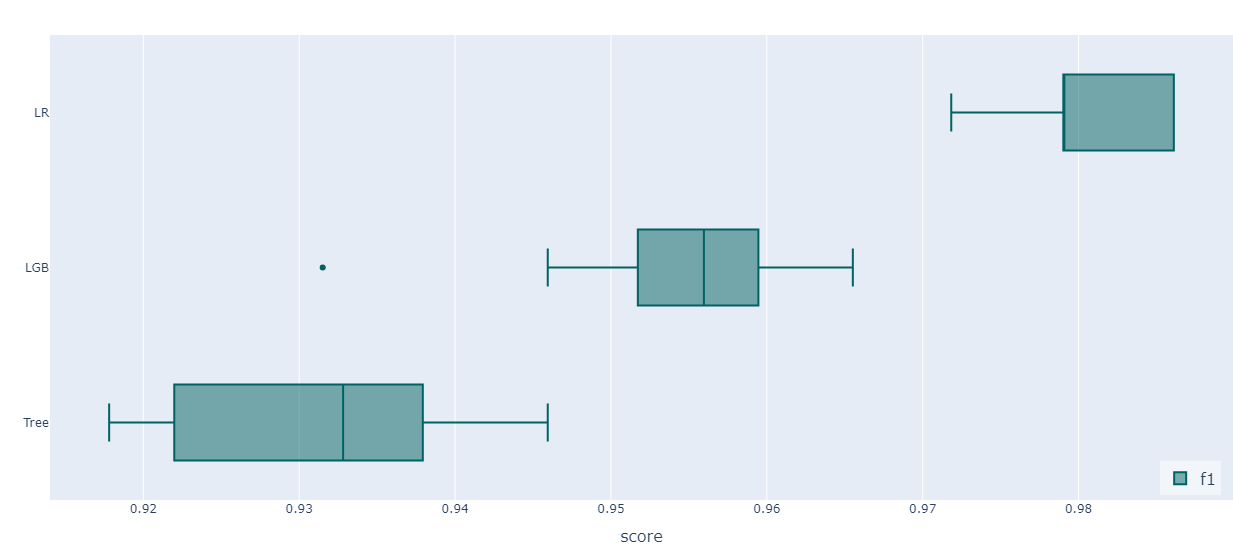

In [5]:
atom.plot_bootstrap()